### Imports and small sample data gen

In [19]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

style.use('fivethirtyeight')

x = np.array([1,2,3,4,5,6], dtype=np.float64)
y = np.array([5,4,6,5,6,7], dtype=np.float64)

# plt.scatter(x, y)
# plt.show()

### Calc m slope and b intercept

In [20]:
def best_fit_slope_and_intercept(x, y):
    m = ( ((mean(x) * mean(y)) - mean(x*y)) 
         / ((mean(x) ** 2) - mean(x * x)) ) 
    b = mean(y) - m * mean(x)
    return m, b

m, b = best_fit_slope_and_intercept(x, y)
print(m, b) 

0.42857142857142866 4.0


### Calc regression line

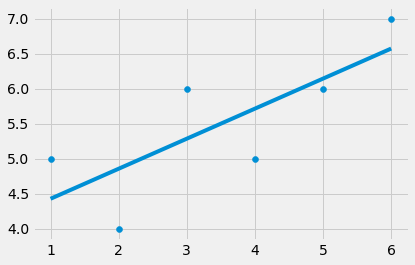

In [21]:
regression_line = [(m * i) + b for i in x]

plt.scatter(x, y)
plt.plot(x, regression_line)
plt.show()

### Predict a point and plot

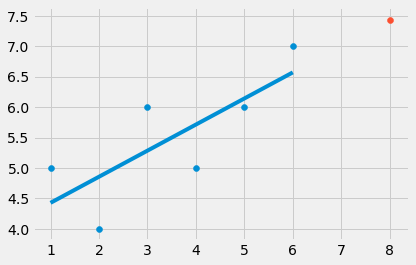

In [22]:
predict_x = 8
predict_y = (m * predict_x) + b

plt.scatter(x, y)
plt.scatter(predict_x, predict_y)
plt.plot(x, regression_line)
plt.show()

### Calc Rsq

In [23]:
def squared_error(y_orig, y_line):  
    return sum((y_line - y_orig) ** 2)

def coef_of_determination(y_orig, y_line):
    y_mean_line = [mean(y_orig) for y in y_orig]
    squared_error_reg = squared_error(y_orig, y_line)
    squared_error_y_mean = squared_error(y_orig, y_mean_line)
    return 1 - (squared_error_reg / squared_error_y_mean)

r_squared = coef_of_determination(y, regression_line)
# print(r_squared)

### 

0.5225257419450808


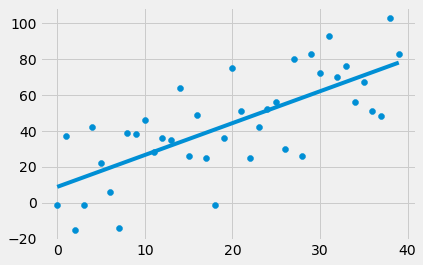

In [24]:
def create_dataset(n, variance, step=2, correlation=False):  # number of datapoints, variance, how far on avg to step up, correl param
    val = 1  # first value of y
    y = []
    for i in range(n):
        y_i = val + random.randrange(-variance, variance)
        y.append(y_i)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
    x = [i for i in range(len(y))]
    return np.array(x, dtype=np.float64), np.array(y, dtype=np.float64)

x, y = create_dataset(40, 40, 2, correlation='pos')  # sample dataset

m, b = best_fit_slope_and_intercept(x, y)

regression_line = [(m * i) + b for i in x]

r_squared = coef_of_determination(y, regression_line)
print(r_squared)

predict_x = 8
predict_y = (m * predict_x) + b

plt.scatter(x, y)
# plt.scatter(predict_x, predict_y)
plt.plot(x, regression_line)
plt.show()